In [1]:
from random import choice
from pathlib import Path
import pickle

In [2]:
upstream = ['forecasting-using-the-model', 'split-test-and-train']
product = None

In [3]:
# Parameters
upstream = {
    "forecasting-using-the-model": {
        "Y_df_forecast": "C:\\Users\\victor\\Documents\\notebooks\\output\\forecasting-using-the-model-Y_df_forecast.pkl",
        "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\forecasting-using-the-model.ipynb",
    },
    "split-test-and-train": {
        "Y_df_test": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-Y_df_test.pkl",
        "output_size": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-output_size.pkl",
        "X_df_train": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-X_df_train.pkl",
        "input_size": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-input_size.pkl",
        "Y_df_train": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-Y_df_train.pkl",
        "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train.ipynb",
    },
}
product = {
    "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\random-country-plot.ipynb"
}


In [4]:
Y_df_forecast = pickle.loads(Path(upstream['forecasting-using-the-model']['Y_df_forecast']).read_bytes())
Y_df_test = pickle.loads(Path(upstream['split-test-and-train']['Y_df_test']).read_bytes())
Y_df_train = pickle.loads(Path(upstream['split-test-and-train']['Y_df_train']).read_bytes())

## Random country plot

<AxesSubplot:title={'center':'Jersey'}, xlabel='ds'>

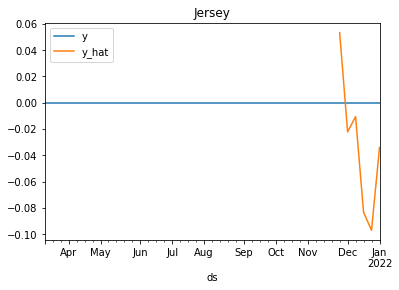

In [5]:
Y_df_plot = Y_df_test.append(Y_df_train).merge(Y_df_forecast, how='left', on=['unique_id', 'ds']).sort_values("ds")
country = choice(Y_df_plot["unique_id"].unique())
Y_df_plot.query(f'unique_id == "{country}"').tail(100).set_index('ds').plot(title=country)